In [4]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [6]:
pima = pd.read_csv(url, header=None, names=col_names)

In [7]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']

In [9]:
x=pima[feature_cols]

In [10]:
y = pima.label

In [11]:
x.shape

(768, 4)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [15]:
logreg= LogisticRegression()

In [16]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred_class= logreg.predict(x_test)

In [18]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.692708333333


In [20]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [21]:
# % of 1
y_test.mean()

0.3229166666666667

In [22]:
1-y_test.mean()

0.6770833333333333

In [23]:
# cal null accuracy for binary classification
max(y_test.mean(), 1-y_test.mean())

0.6770833333333333

In [24]:
# cal null accuracy for multi-class classification
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

In [26]:
#ccomparing the true and predicted response values
print 'True', y_test.values[0:25]
print 'Pred', y_pred_class[0:25]

True [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Confusion Matrix 
table that describes the performance of a classification model

In [27]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[118  12]
 [ 47  15]]


In [28]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)

In [33]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [31]:
TP

15

Metrics computed from a confusion matrix

In [35]:
#classification accuracy
print (TP+TN)/float(TP+TN+FP+FN)
print metrics.accuracy_score(y_test, y_pred_class)

0.692708333333
0.692708333333


In [36]:
#classification error or misclassification rate: how often classifier
# incorrect
print (FP+FN)/float(TP+TN+FP+FN)
print 1- metrics.accuracy_score(y_test, y_pred_class)


0.307291666667
0.307291666667


In [38]:
# sensitivity or True Positive Rate or Recall:
# when the actual value is +ve, how often is the prediction correct?

print TP/float(TP+FN)
print metrics.recall_score(y_test, y_pred_class)


0.241935483871
0.241935483871


In [40]:
# specificity : how specific or selective is the classifier in predi
#cting positive instances?
#when the actual value is -ve, how often is the prediction correct

print TN/float(TN+FP)

0.907692307692


In [41]:
# False Positive rate : when the actual value is -Ve, how often is the
# prediction incorrect?

print FP / float (TN+FP)

0.0923076923077


In [43]:
#precision : when a + value is predicted, how often is the prediction
# correct
print TP/float(TP+FP)
print metrics.precision_score(y_test, y_pred_class)

0.555555555556
0.555555555556


# Adjusting the classification threshold to improve model

In [46]:
logreg.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [50]:
logreg.predict_proba(x_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [49]:
logreg.predict_proba(x_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [51]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

(0, 1)

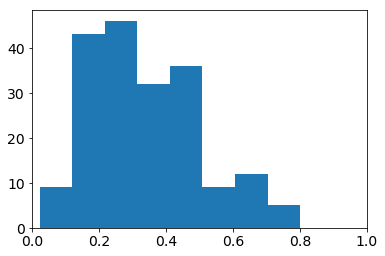

In [55]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)

In [56]:
# decrease the thresold to predicting diabetes in order to increase the
# sensitivity of the classifier
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [57]:
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [58]:
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [59]:
print confusion

[[118  12]
 [ 47  15]]


In [60]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[80 50]
 [16 46]]


In [62]:
# sensitivity
print 46/ float(46+16)

0.741935483871


In [63]:
#soecivity 
print 80/float(80+50)

0.615384615385


#ROC Curves : to plot how sensitivity and specificity are affected by various thresold, without actually changing the thresold

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

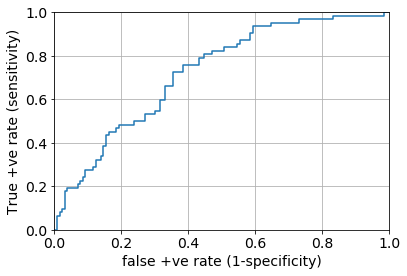

In [66]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("false +ve rate (1-specificity)")
plt.ylabel("True +ve rate (sensitivity)")
plt.grid(True)

In [70]:
# function that give sensitivity & specificity 
def evaluate_thresold(threshold):
    print 'Sensitivity:', tpr[thresholds > threshold][-1]
    print 'Specificity:', 1-fpr[thresholds > threshold][-1]

In [71]:
evaluate_thresold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [72]:
evaluate_thresold(0.3)

Sensitivity: 0.725806451613
Specificity: 0.615384615385


In [74]:
#AUC : area under curve of ROC curve or % of the ROC plot is under-
#neath the curve 

In [75]:
print metrics.roc_auc_score(y_test, y_pred_prob)

0.724565756824


In [76]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, x, y, cv=10, scoring='roc_auc').mean()

0.73782336182336183